In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from os import path
import pandas as pd
import matplotlib.ticker as ticker
from scipy import stats
import itertools

data_dir = path.join("/home/katelyn/Documents/COSC490/Stemming/Data","pre-trec")
labels = ["paiceHusk", "krovetz", "sStripping", "porter2", "lovins", "wikt", "none"]
collections_shorthand = ["adi", "cacm", "cisi", "cran", "cf", "lisa", "med", "npl", "time"]
collections = ["ADI", "CACM", "CISI", "Cranfield", "CysticFibrosis", "LISA", "Medline", "NPL", "Time"]
MARKERS = ["o","^","s","*","d", "P", "X"]
marker = itertools.cycle(MARKERS)

## Preparing Data

In [29]:
df_list = list()

for col, collection in zip(collections_shorthand, collections):
    df = pd.read_csv(path.join(data_dir,f"{col}-MAP"),sep="\\s+")
    df["collection"] = collection
    df_list.append(df)

data = pd.concat(df_list, ignore_index=True)

data_avg = data[data["qid"] == "all"]
data = data.drop(data[data["qid"] == "all"].index)

## MAP

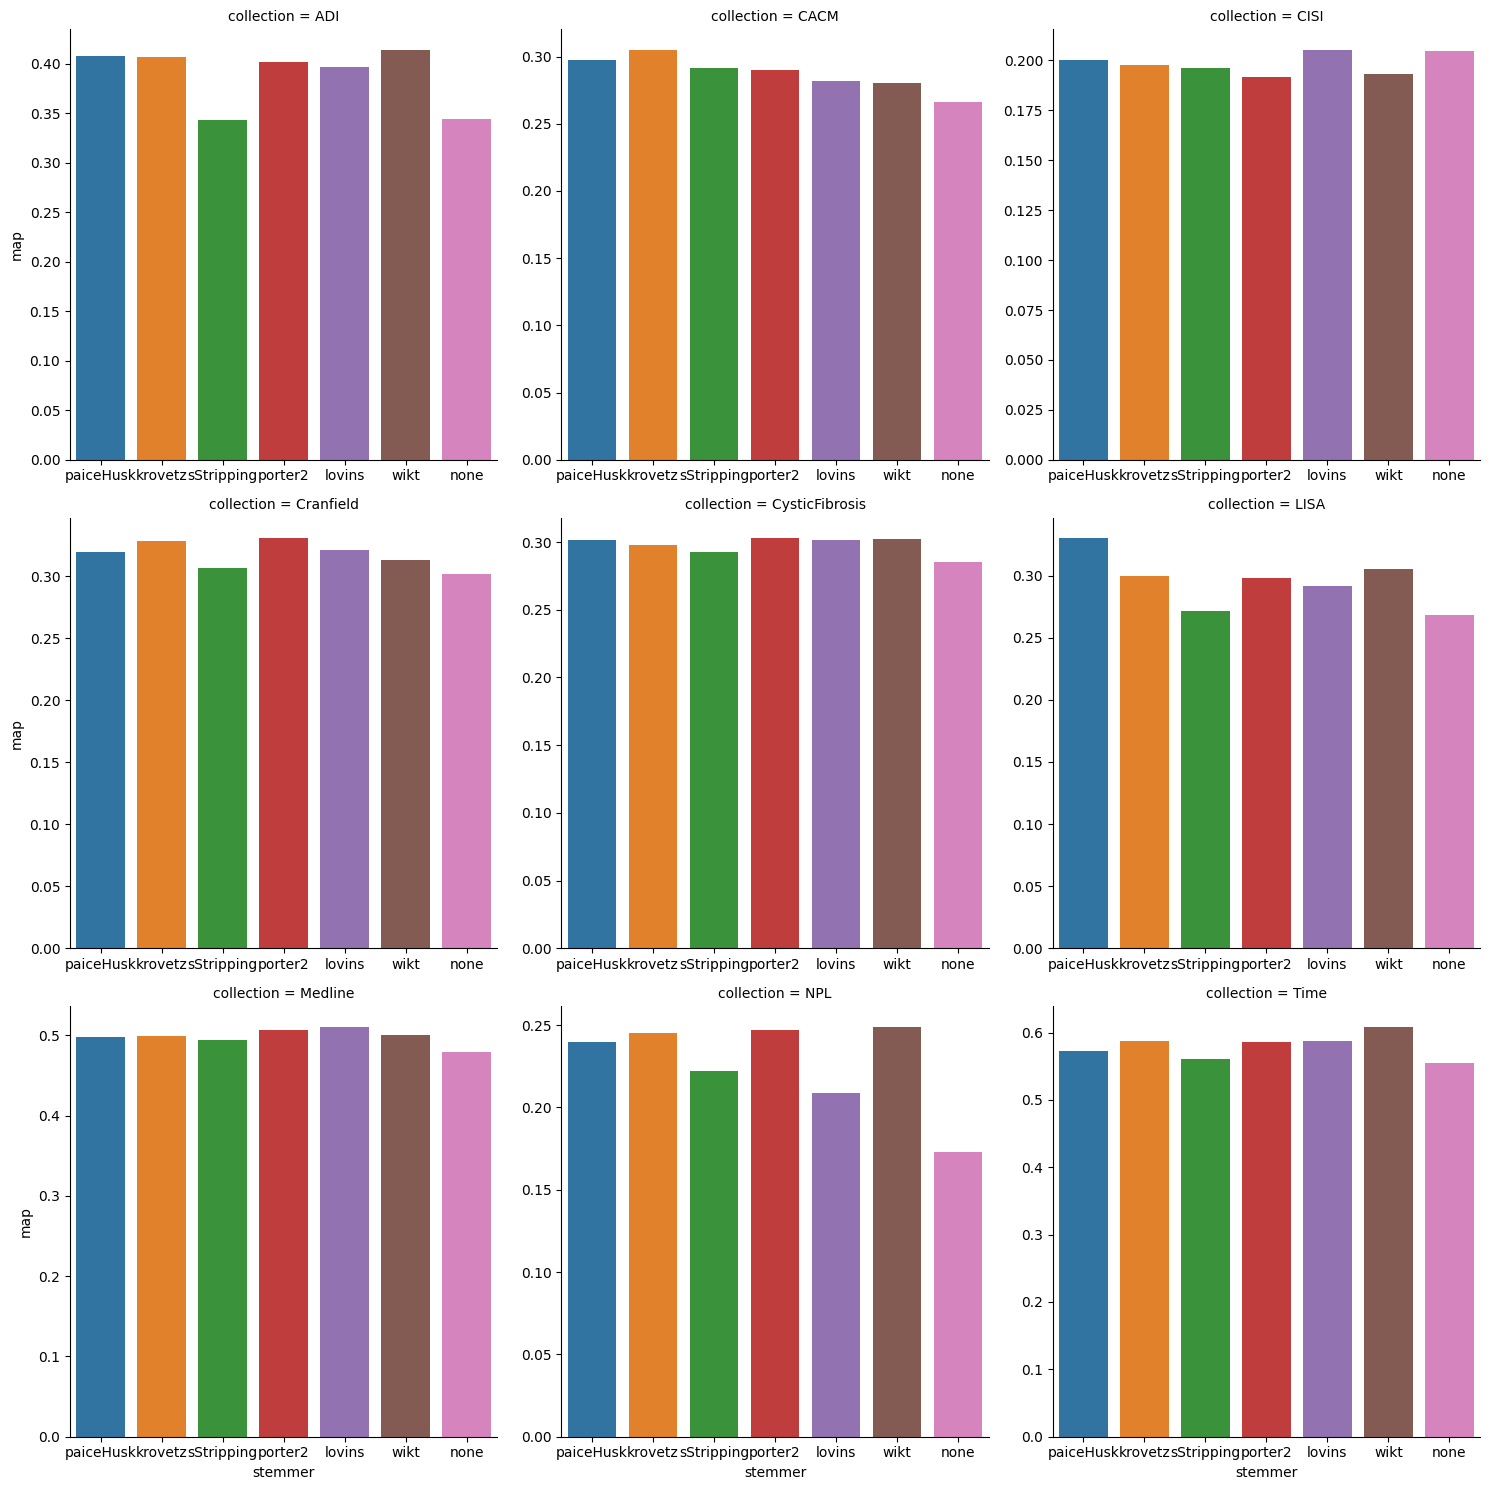

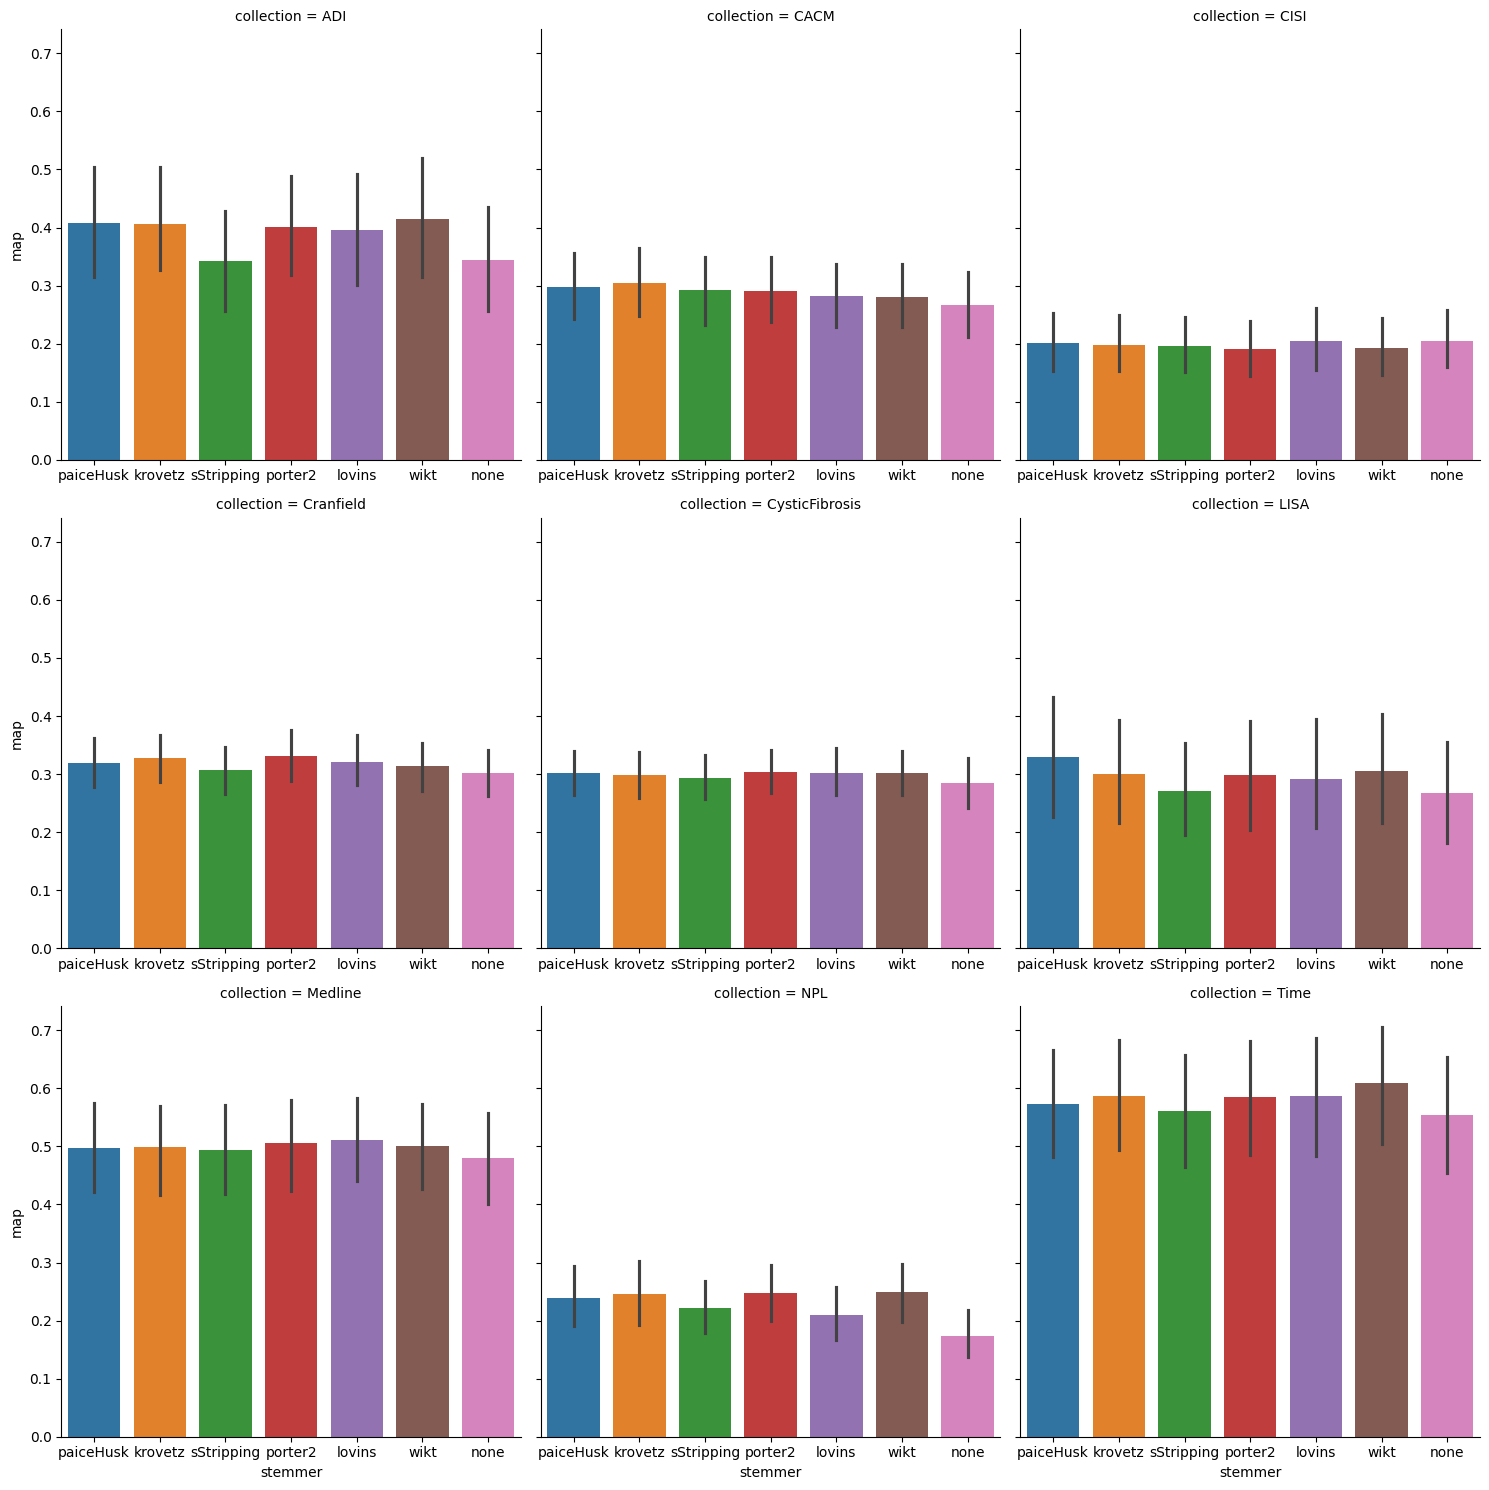

In [45]:
axes = sns.catplot(data=data_avg, kind="bar", x="stemmer", hue="stemmer", y="map", col="collection", col_wrap=3, sharex=False, sharey=False)
plt.show()
axes = sns.catplot(data=data, kind="bar", x="stemmer", hue="stemmer", y="map", col="collection", col_wrap=3, sharex=False)
plt.show()

## Statistical Significance

### ADI

In [31]:
target_data = data[data["collection"] == "ADI"]

s = target_data[target_data["stemmer"] == "porter2"].loc[:,"map"].tolist()
n = target_data[target_data["stemmer"] == "none"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(s,n)}")
s = target_data[target_data["stemmer"] == "paiceHusk"].loc[:,"map"].tolist()
n = target_data[target_data["stemmer"] == "none"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(s,n)}")
s = target_data[target_data["stemmer"] == "porter2"].loc[:,"map"].tolist()
n = target_data[target_data["stemmer"] == "paiceHusk"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(s,n)}")
s = target_data[target_data["stemmer"] == "wikt"].loc[:,"map"].tolist()
n = target_data[target_data["stemmer"] == "none"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(s,n)}")
s = target_data[target_data["stemmer"] == "sStripping"].loc[:,"map"].tolist()
n = target_data[target_data["stemmer"] == "none"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(s,n)}")

TtestResult(statistic=1.5518214210382786, pvalue=0.12996469344123174, df=34)
TtestResult(statistic=1.4261501266117151, pvalue=0.16294300934199507, df=34)
TtestResult(statistic=-0.23457527357603525, pvalue=0.8159453443586175, df=34)
TtestResult(statistic=1.7449239074138156, pvalue=0.09003208489551869, df=34)
TtestResult(statistic=-0.12099985730195374, pvalue=0.9044034198112405, df=34)


### CACM

In [40]:
#t-test between wikt and none
w = data[data["stemmer"] == "wikt"].loc[:,"map"].tolist()
n = data[data["stemmer"] == "none"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(w,n)}")

TtestResult(statistic=0.9801145478974522, pvalue=0.33165628288764526, df=51)


In [44]:
#t-test between krovetz and none (best and worst)
k = data[data["stemmer"] == "krovetz"].loc[:,"map"].tolist()
n = data[data["stemmer"] == "none"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(k,n)}")

TtestResult(statistic=2.5617223013679267, pvalue=0.01341420172365411, df=51)


In [43]:
#t-test between wikt and porter2 
w = data[data["stemmer"] == "wikt"].loc[:,"map"].tolist()
p = data[data["stemmer"] == "porter2"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(w,p)}")

TtestResult(statistic=-0.9247125376501915, pvalue=0.35947033018070984, df=51)


### CISI

In [49]:
#t-test between wikt and none (worst stemmer and no stemming)
w = data[data["stemmer"] == "wikt"].loc[:,"map"].tolist()
n = data[data["stemmer"] == "none"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(w,n)}")

TtestResult(statistic=2.7604937098538325, pvalue=0.007250902787154485, df=75)


In [51]:
#t-test between wikt and porter2
w = data[data["stemmer"] == "wikt"].loc[:,"map"].tolist()
p = data[data["stemmer"] == "porter2"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(w,p)}")

TtestResult(statistic=-1.809967346154518, pvalue=0.0743068232552188, df=75)


### Cranfield

In [46]:
target_data = data[data["collection"] == "Cranfield"]

s = target_data[target_data["stemmer"] == "porter2"].loc[:,"map"].tolist()
n = target_data[target_data["stemmer"] == "none"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(s,n)}")
s = target_data[target_data["stemmer"] == "paiceHusk"].loc[:,"map"].tolist()
n = target_data[target_data["stemmer"] == "none"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(s,n)}")
s = target_data[target_data["stemmer"] == "porter2"].loc[:,"map"].tolist()
n = target_data[target_data["stemmer"] == "paiceHusk"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(s,n)}")
s = target_data[target_data["stemmer"] == "wikt"].loc[:,"map"].tolist()
n = target_data[target_data["stemmer"] == "none"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(s,n)}")
s = target_data[target_data["stemmer"] == "sStripping"].loc[:,"map"].tolist()
n = target_data[target_data["stemmer"] == "none"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(s,n)}")

TtestResult(statistic=2.7050483810148798, pvalue=0.00789659297011807, df=112)
TtestResult(statistic=1.724166711006267, pvalue=0.08743674323179161, df=112)
TtestResult(statistic=1.6307638378963065, pvalue=0.1057491829006809, df=112)
TtestResult(statistic=0.9459029964253517, pvalue=0.34623432476244786, df=112)
TtestResult(statistic=0.8566959457643006, pvalue=0.3934422399190248, df=112)


In [47]:
target = data_avg[data_avg["collection"] == "Cranfield"]
display(target)

,stemmer,qid,map,collection
1009,paiceHusk,all,0.3195,Cranfield
1123,krovetz,all,0.3282,Cranfield
1237,sStripping,all,0.3069,Cranfield
1351,porter2,all,0.3307,Cranfield
1465,lovins,all,0.3215,Cranfield
1579,wikt,all,0.3135,Cranfield
1693,none,all,0.3021,Cranfield


### CysticFibrosis

In [62]:
#t-test between wikt and none (best and worst)
w = data[data["stemmer"] == "wikt"].loc[:,"map"].tolist()
n = data[data["stemmer"] == "none"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(w,n)}")

TtestResult(statistic=4.548887307426953, pvalue=1.5317996324202444e-05, df=99)


In [63]:
#t-test between wikt and sStripping (best and second worst)
w = data[data["stemmer"] == "wikt"].loc[:,"map"].tolist()
s = data[data["stemmer"] == "sStripping"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(w,s)}")

TtestResult(statistic=3.5212979047052957, pvalue=0.0006510418165336274, df=99)


In [28]:
#t-test between wikt and porter2 (best and average)
w = data[data["stemmer"] == "wikt"].loc[:,"map"].tolist()
p = data[data["stemmer"] == "porter2"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(w,p)}")

TtestResult(statistic=1.969272915256034, pvalue=0.05171682719913949, df=99)


,stemmer,defaultMAP,tunedMAP
0,paiceHusk,0.299347,0.300242
1,krovetz,0.295711,0.297918
2,sStripping,0.288334,0.292490
3,porter2,0.297990,0.302762
4,lovins,0.296446,0.303783
5,wikt,0.301400,0.300106
6,none,0.280867,0.285235


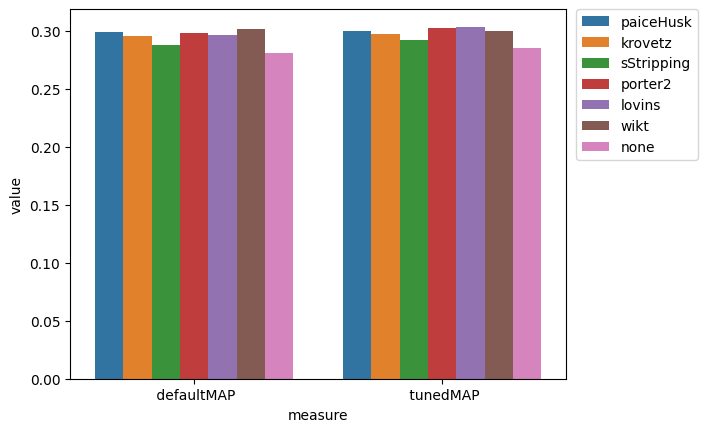

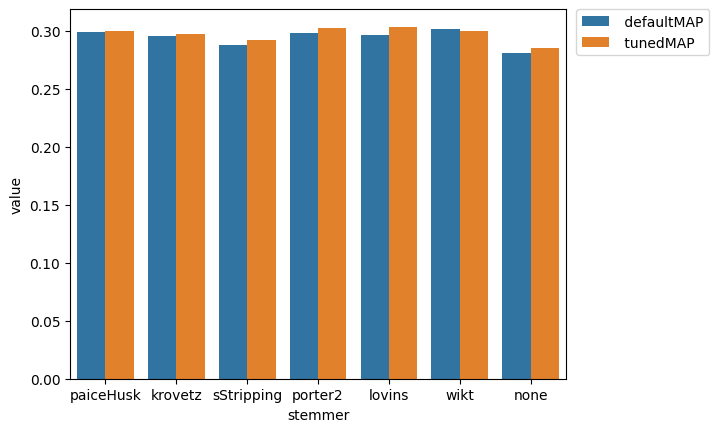

In [10]:
data = pd.read_csv(path.join("BM25","cf.csv"))
display(data)
data = data.melt(id_vars="stemmer").rename({"variable":"measure"}, axis=1)

sns.barplot(data=data, y="value", x="measure", hue="stemmer")
plt.legend(bbox_to_anchor=(1.02,1),loc="upper left",borderaxespad=0)
plt.show()

sns.barplot(data=data, y="value", hue="measure", x="stemmer")
plt.legend(bbox_to_anchor=(1.02,1),loc="upper left",borderaxespad=0)
plt.show()

### LISA

In [88]:
#t-test between wikt and none
w = data[data["stemmer"] == "wikt"].loc[:,"map"].tolist()
n = data[data["stemmer"] == "none"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(w,n)}")

TtestResult(statistic=2.355485351636764, pvalue=0.02523149470362905, df=30)


In [86]:
#t-test between paiceHusk and none (best and worst)
p = data[data["stemmer"] == "paiceHusk"].loc[:,"map"].tolist()
n = data[data["stemmer"] == "none"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(p,n)}")

TtestResult(statistic=1.787347987324497, pvalue=0.0839891476638431, df=30)


In [67]:
#t-test between wikt and porter2
w = data[data["stemmer"] == "wikt"].loc[:,"map"].tolist()
p = data[data["stemmer"] == "porter2"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(w,p)}")

TtestResult(statistic=0.6318687851203411, pvalue=0.5322586317131052, df=30)


### Medline

In [70]:
#t-test between wikt and none
w = data[data["stemmer"] == "wikt"].loc[:,"map"].tolist()
n = data[data["stemmer"] == "none"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(w,n)}")

TtestResult(statistic=1.66139627043369, pvalue=0.10740854764248106, df=29)


In [72]:
#t-test between lovins and none (best and worst)
l = data[data["stemmer"] == "lovins"].loc[:,"map"].tolist()
n = data[data["stemmer"] == "none"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(l,n)}")

TtestResult(statistic=2.1691689341699023, pvalue=0.038408626368699864, df=29)


In [73]:
#t-test between lovins and sStripping (best and lowest stemmer)
l = data[data["stemmer"] == "lovins"].loc[:,"map"].tolist()
s = data[data["stemmer"] == "sStripping"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(l,s)}")

TtestResult(statistic=1.1302132631164543, pvalue=0.2676478049568715, df=29)


### NPL

In [75]:
#t-test between wikt and none
w = data[data["stemmer"] == "wikt"].loc[:,"map"].tolist()
n = data[data["stemmer"] == "none"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(w,n)}")

TtestResult(statistic=4.975075546162294, pvalue=3.020791280254699e-06, df=92)


In [76]:
#t-test between porter2 and none (best and worst)
p = data[data["stemmer"] == "porter2"].loc[:,"map"].tolist()
n = data[data["stemmer"] == "none"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(p,n)}")

TtestResult(statistic=5.202035859073994, pvalue=1.188162173350786e-06, df=92)


In [77]:
#t-test between wikt and porter2
w = data[data["stemmer"] == "wikt"].loc[:,"map"].tolist()
p = data[data["stemmer"] == "porter2"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(w,p)}")

TtestResult(statistic=-0.37542841761287443, pvalue=0.7082060646014181, df=92)


In [78]:
#t-test between porter2 and sStripping (best and lowest stemmer)
p = data[data["stemmer"] == "porter2"].loc[:,"map"].tolist()
s = data[data["stemmer"] == "sStripping"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(p,s)}")

TtestResult(statistic=1.6299697697626583, pvalue=0.10652712246507329, df=92)


In [79]:
#t-test between sStripping and none (lowest stemmer and none)
s = data[data["stemmer"] == "sStripping"].loc[:,"map"].tolist()
n = data[data["stemmer"] == "none"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(s,n)}")

TtestResult(statistic=5.173604716906251, pvalue=1.3369876183302565e-06, df=92)


### Time

In [83]:
#t-test between wikt and none
w = data[data["stemmer"] == "wikt"].loc[:,"map"].tolist()
n = data[data["stemmer"] == "none"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(w,n)}")

TtestResult(statistic=0.3984666364408729, pvalue=0.6913219051426911, df=82)


In [81]:
#t-test between krovetz and sStripping (best and worst)
k = data[data["stemmer"] == "krovetz"].loc[:,"map"].tolist()
s = data[data["stemmer"] == "sStripping"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(k,s)}")

TtestResult(statistic=1.4349971488619413, pvalue=0.15509115665242415, df=82)


In [82]:
#t-test between wikt and porter2
w = data[data["stemmer"] == "wikt"].loc[:,"map"].tolist()
p = data[data["stemmer"] == "porter2"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(w,p)}")

TtestResult(statistic=0.4504750935019193, pvalue=0.6535567325942881, df=82)
